In [428]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob

import cv2
from PIL import Image

import copy

from keras.layers import MaxPooling1D, LocallyConnected2D
from keras.models import Model,Input

In [4]:
ls

How-to-work-with-sound?.ipynb  sample_songs/
Untitled.ipynb                 sample_specs/
output/


In [284]:
spec1, spec2, spec3= (np.load(path) for path in glob("sample_specs/spec*.npy"))

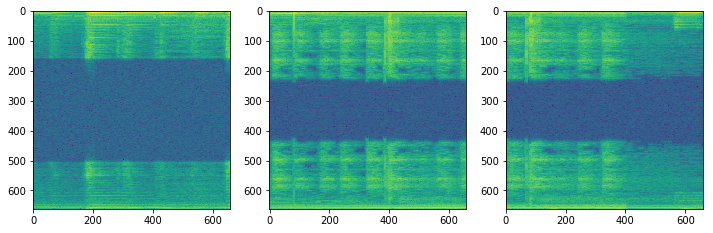

In [285]:
fig = plt.figure(figsize = (12,10))
plt.subplot(131)
plt.imshow(spec1)
plt.subplot(132)
plt.imshow(spec2)
plt.subplot(133)
plt.imshow(spec3)


plt.imshow(spec3)

## 1. Edge Detection

### 1.1 Edge detection on the spectrograms


In [ ]:
def edges_spec(spec,lowerbound = 100, upperbound = 200,scale = None):
    """
    Given a spectogram, perform edge detection and return the edges
    """
    if scale:
        spec = spec*scale
    # overlay the spec on a bet of 255's (black)
    height,width = spec.shape
    tmp = np.repeat(255, height*width*2).reshape((height,width,2))
    tmp[:,:,0] = spec
    spec = tmp.astype('uint8')
    # perform edge detection
    edges = cv2.Canny(spec, lowerbound,upperbound)
    return edges

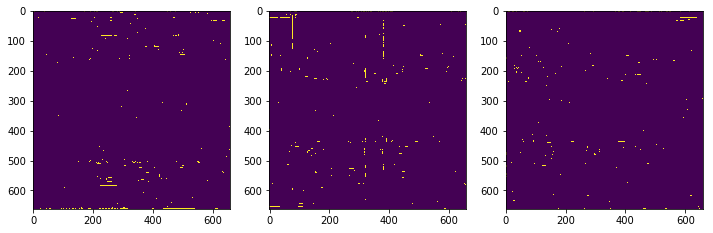

In [287]:
edges_spec1 = edges_spec(spec1, scale = 255)
edges_spec2 = edges_spec(spec2, scale = 255)
edges_spec3 = edges_spec(spec3, scale = 255)

fig = plt.figure(figsize = (12,10))
plt.subplot(131)
plt.imshow(edges_spec1)
plt.subplot(132)
plt.imshow(edges_spec2)
plt.subplot(133)
plt.imshow(edges_spec3)


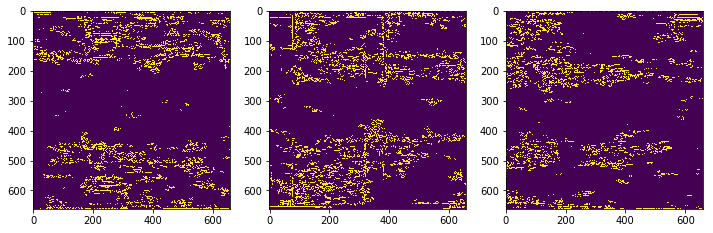

In [288]:
edges_spec1 = edges_spec(spec1, scale = 255,lowerbound=0,upperbound=200)
edges_spec2 = edges_spec(spec2, scale = 255,lowerbound=0,upperbound=200)
edges_spec3 = edges_spec(spec3, scale = 255,lowerbound=0,upperbound=200)

fig = plt.figure(figsize = (12,10))
plt.subplot(131)
plt.imshow(edges_spec1)
plt.subplot(132)
plt.imshow(edges_spec2)
plt.subplot(133)
plt.imshow(edges_spec3)


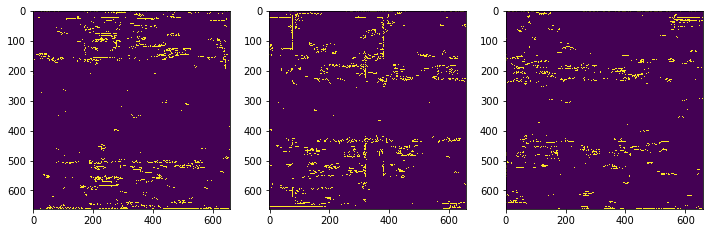

In [290]:
edges_spec1 = edges_spec(spec1, scale = 255,lowerbound=50,upperbound=200)
edges_spec2 = edges_spec(spec2, scale = 255,lowerbound=50,upperbound=200)
edges_spec3 = edges_spec(spec3, scale = 255,lowerbound=50,upperbound=200)

fig = plt.figure(figsize = (12,10))
plt.subplot(131)
plt.imshow(edges_spec1)
plt.subplot(132)
plt.imshow(edges_spec2)
plt.subplot(133)
plt.imshow(edges_spec3)


### 1.2 Edge detection on the real pictures


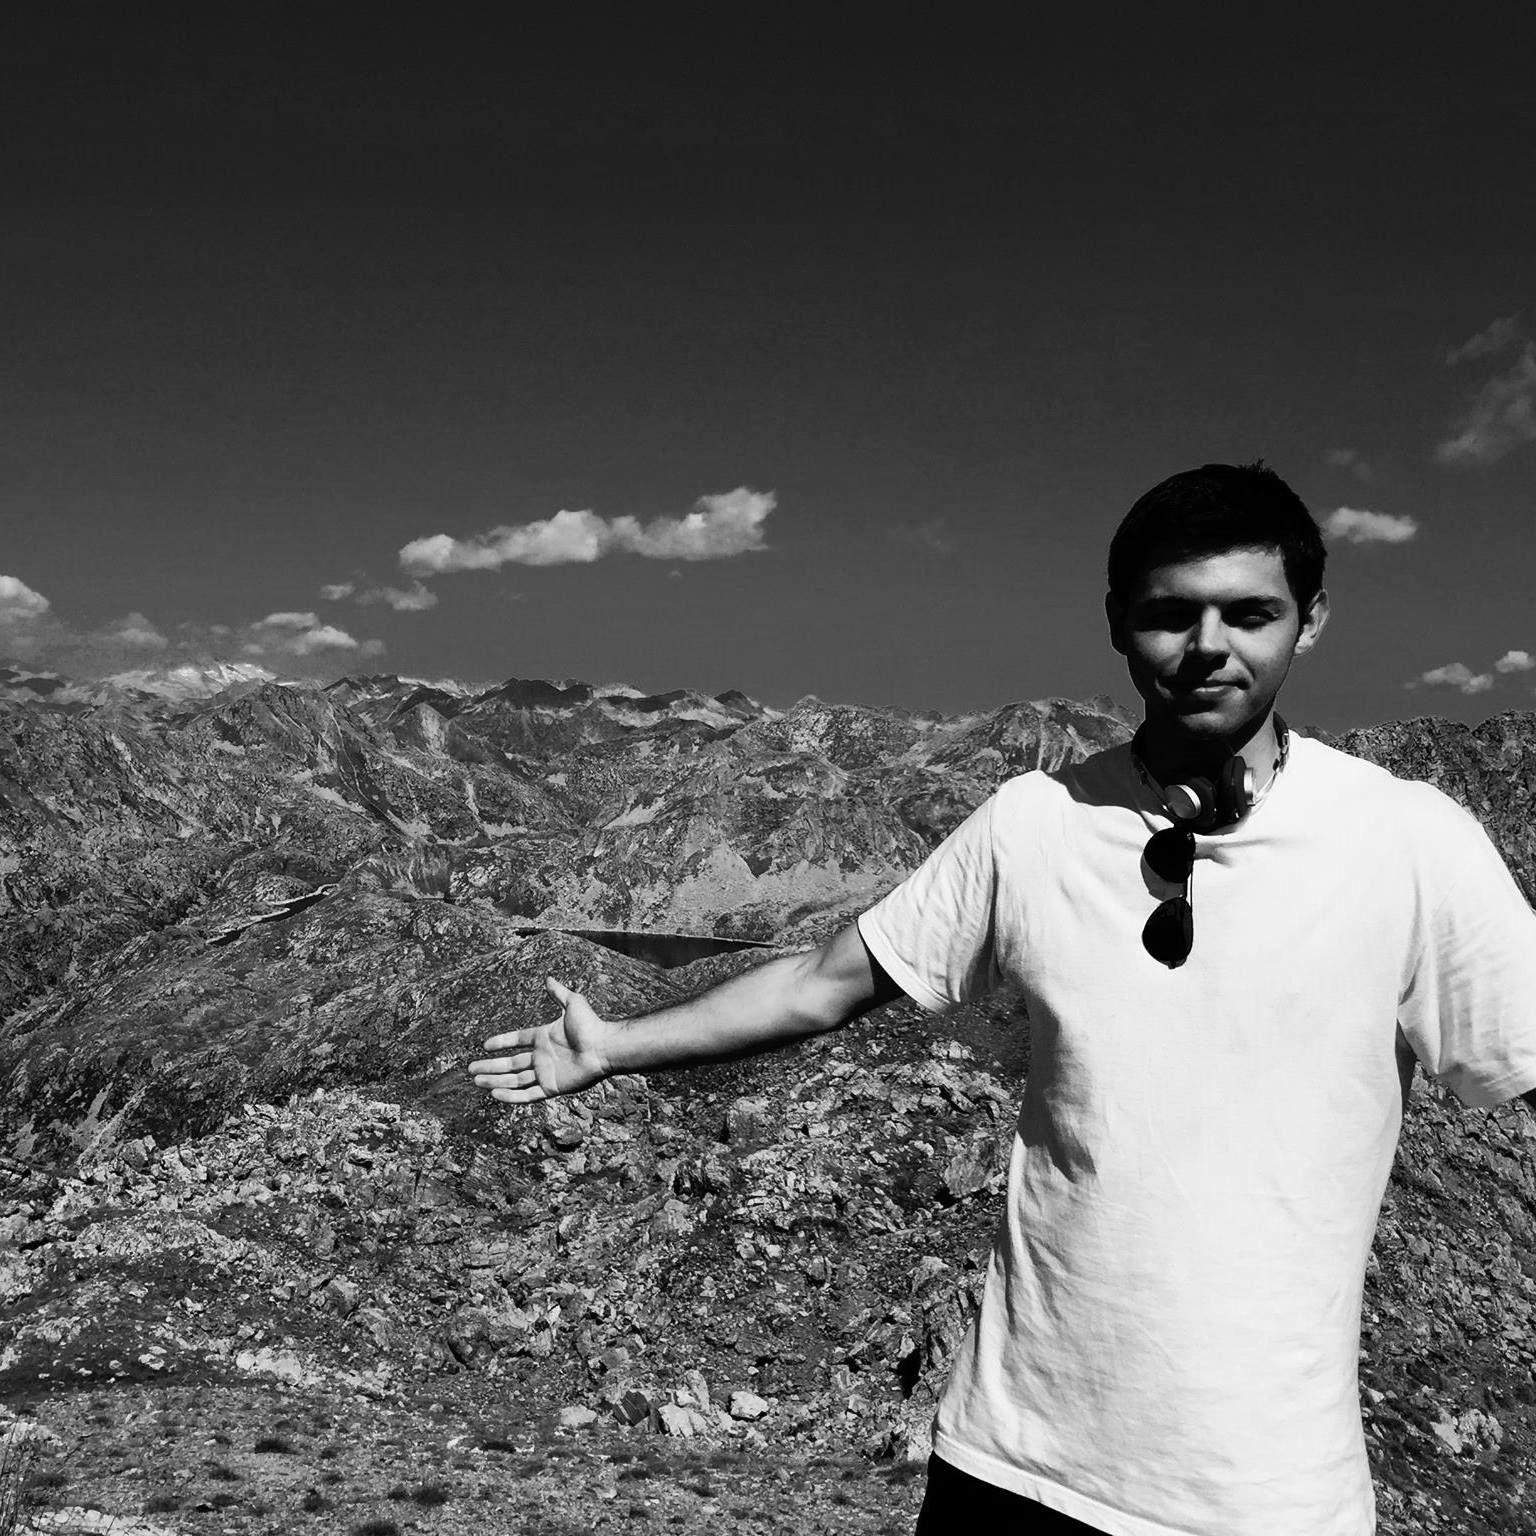

In [77]:
eli_img = Image.open('sample_images/eli_prof.jpg').convert("LA")
eli_img

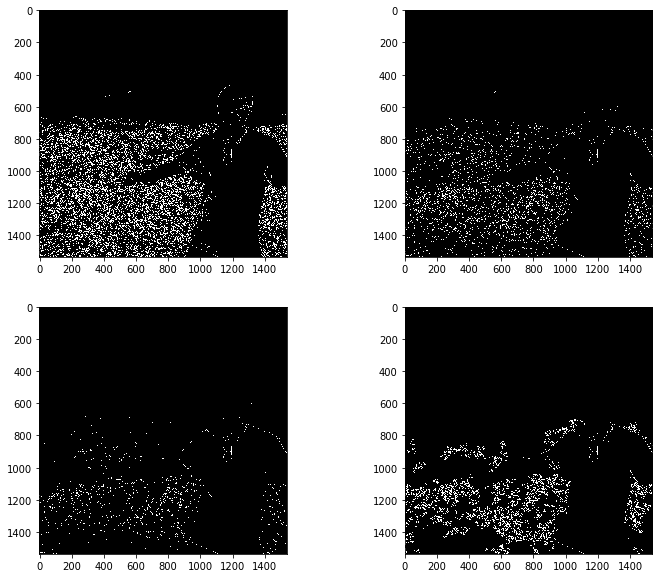

In [226]:
eli = np.array(eli_img)

fig = plt.figure(figsize = (12,10))

plt.subplot(221)
edges2 = cv2.Canny(eli, 200,300)
plt.imshow(edges2,cmap = "gray")


plt.subplot(222)
edges2 = cv2.Canny(eli, 400,500)
plt.imshow(edges2,cmap = "gray")

plt.subplot(223)
edges2 = cv2.Canny(eli, 400,800)
plt.imshow(edges2,cmap = "gray")

plt.subplot(224)
edges2 = cv2.Canny(eli, 100,1000)
plt.imshow(edges2,cmap = "gray")

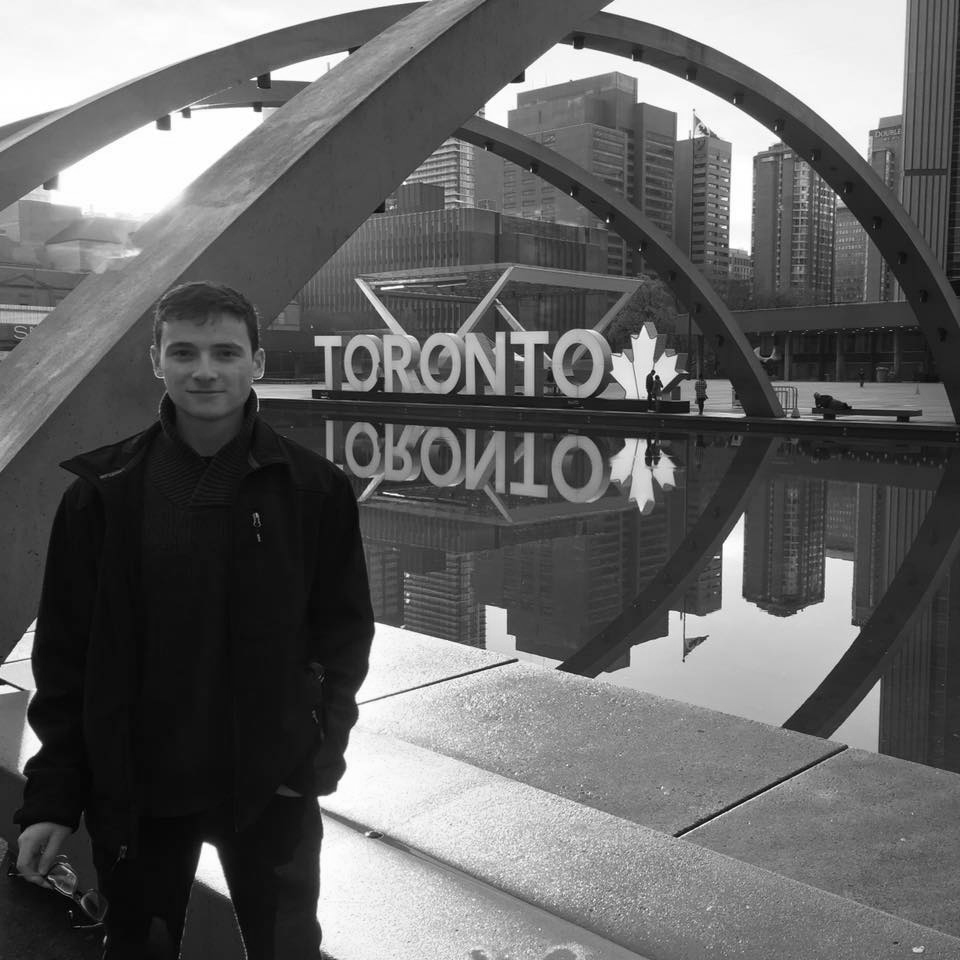

In [309]:
timi_img = Image.open('sample_images/timi.jpg').convert("LA")
timi_img

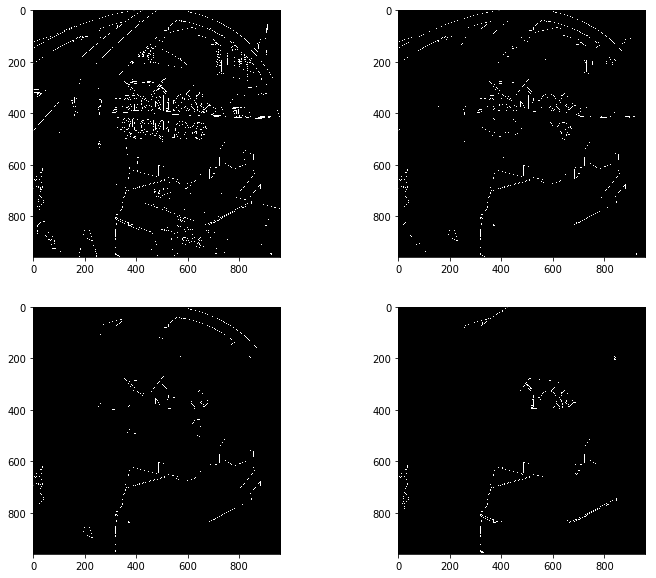

In [310]:
timi = np.array(timi_img)

fig = plt.figure(figsize = (12,10))

plt.subplot(221)
edges2 = cv2.Canny(timi, 200,300)
plt.imshow(edges2,cmap = "gray")


plt.subplot(222)
edges2 = cv2.Canny(timi, 400,500)
plt.imshow(edges2,cmap = "gray")

plt.subplot(223)
edges2 = cv2.Canny(timi, 400,800)
plt.imshow(edges2,cmap = "gray")

plt.subplot(224)
edges2 = cv2.Canny(timi, 100,1000)
plt.imshow(edges2,cmap = "gray")

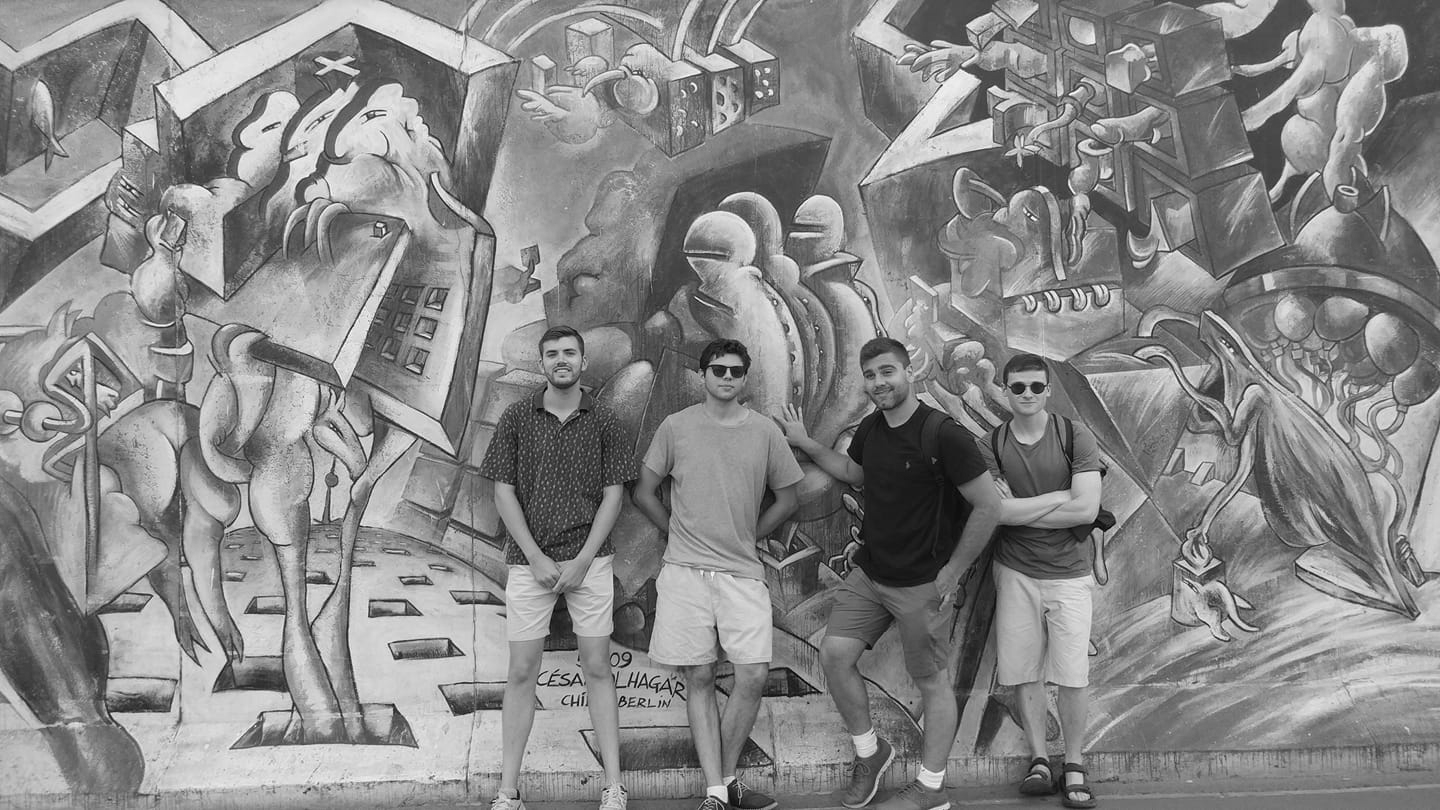

In [214]:
berlin_img = Image.open('sample_images/berlin_wall.jpg').convert("LA")
berlin_img

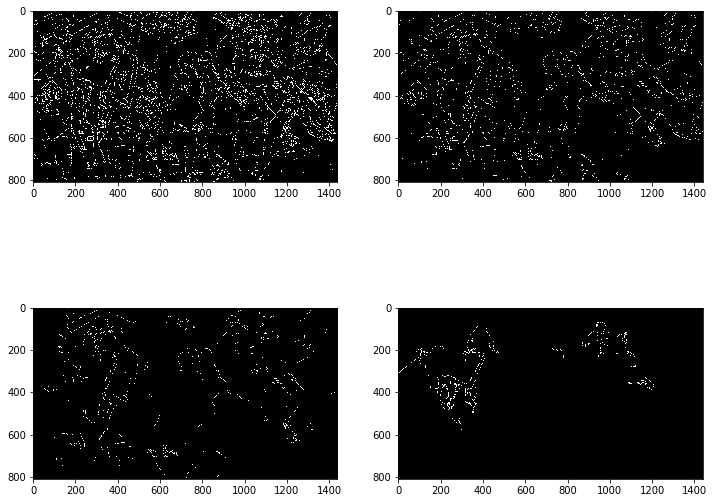

In [228]:
berlin = np.array(berlin_img)

fig = plt.figure(figsize = (12,10))

plt.subplot(221)
edges2 = cv2.Canny(berlin, 200,300)
plt.imshow(edges2,cmap = "gray")


plt.subplot(222)
edges2 = cv2.Canny(berlin, 400,500)
plt.imshow(edges2,cmap = "gray")

plt.subplot(223)
edges2 = cv2.Canny(berlin, 400,800)
plt.imshow(edges2,cmap = "gray")

plt.subplot(224)
edges2 = cv2.Canny(berlin, 100,1000)
plt.imshow(edges2,cmap = "gray")

## 2. One-hot images

In [299]:
def onehot_spec(spec,threshold = .5,greater = True, low = 0, high = 1):
    spec = copy.copy(spec)
    if greater:
        black = spec < threshold
    else:
        black = spec > threshold
    white = np.logical_not(black)
    # reset values
    spec[black] = low
    spec[white] = high
    
    return spec


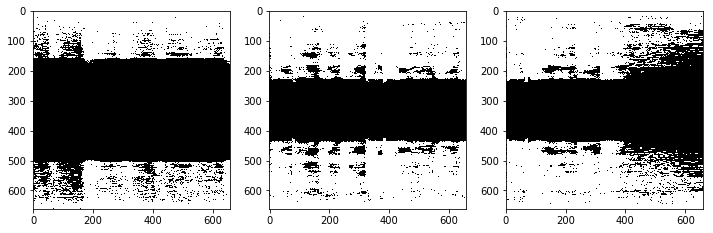

In [291]:
fig = plt.figure(figsize = (12,10))
plt.subplot(131)
plt.imshow(onehot_spec(spec1,threshold=.5), cmap = "gray")


plt.subplot(132)
plt.imshow(onehot_spec(spec2,threshold=.5), cmap = "gray")

plt.subplot(133)
plt.imshow(onehot_spec(spec3,threshold=.5), cmap = "gray")



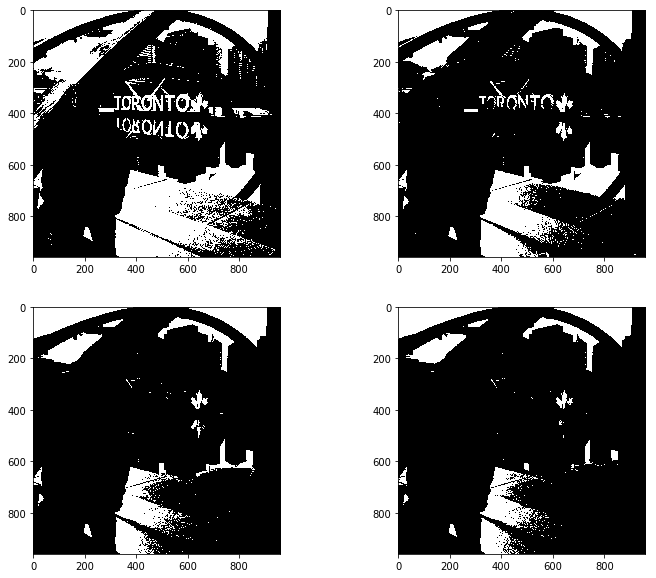

In [295]:
fig = plt.figure(figsize = (12,10))
plt.subplot(221)
plt.imshow(onehot_spec(timi[:,:,0],threshold=256/2, low =0, high = 1), cmap = "gray")


plt.subplot(222)
plt.imshow(onehot_spec(timi[:,:,0],threshold=256/3*2, low =0, high = 1), cmap = "gray")

plt.subplot(223)
plt.imshow(onehot_spec(timi[:,:,0],threshold=256/5*4, low =0, high = 1), cmap = "gray")

plt.subplot(224)
plt.imshow(onehot_spec(timi[:,:,0],threshold=256/6*5, low =0, high = 1), cmap = "gray")




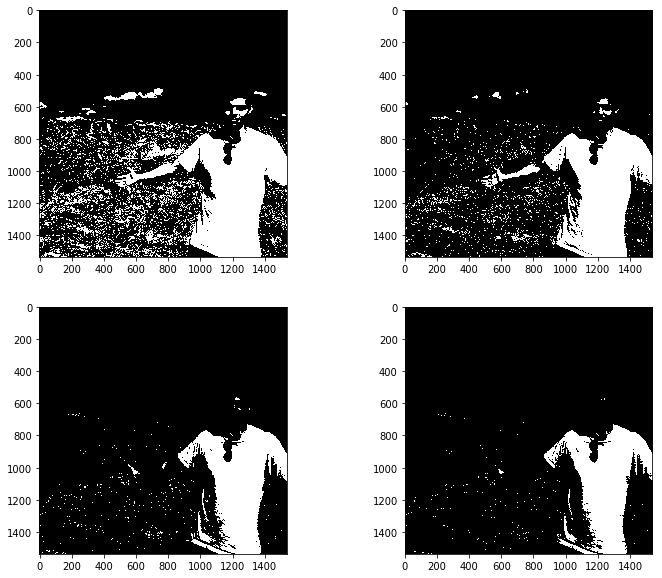

In [296]:
fig = plt.figure(figsize = (12,10))
plt.subplot(221)
plt.imshow(onehot_spec(eli[:,:,0],threshold=256/2, low =0, high = 1), cmap = "gray")


plt.subplot(222)
plt.imshow(onehot_spec(eli[:,:,0],threshold=256/3*2, low =0, high = 1), cmap = "gray")

plt.subplot(223)
plt.imshow(onehot_spec(eli[:,:,0],threshold=256/5*4, low =0, high = 1), cmap = "gray")


plt.subplot(224)
plt.imshow(onehot_spec(eli[:,:,0],threshold=256/6*5, low =0, high = 1), cmap = "gray")

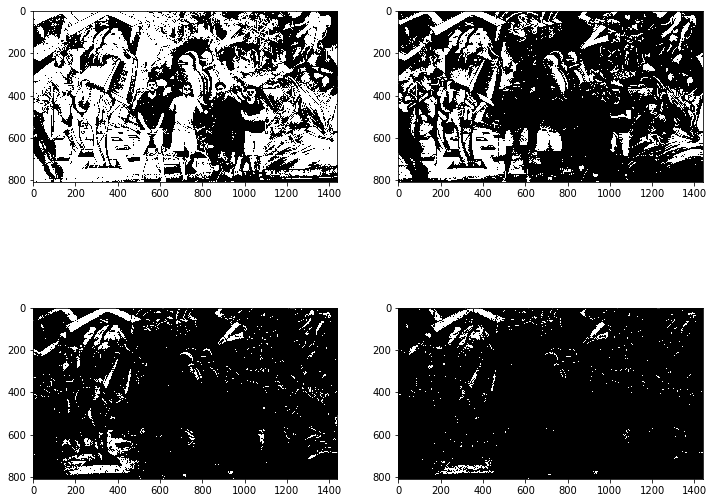

In [300]:
fig = plt.figure(figsize = (12,10))
plt.subplot(221)
plt.imshow(onehot_spec(berlin[:,:,0],threshold=256/2, low =0, high = 1), cmap = "gray")

plt.subplot(222)
plt.imshow(onehot_spec(berlin[:,:,0],threshold=256/3*2, low =0, high = 1), cmap = "gray")

plt.subplot(223)
plt.imshow(onehot_spec(berlin[:,:,0],threshold=256/5*4, low =0, high = 1), cmap = "gray")

plt.subplot(224)
plt.imshow(onehot_spec(berlin[:,:,0],threshold=256/6*5, low =0, high = 1), cmap = "gray")


## 3. Preprocessing with Gaussian Blur

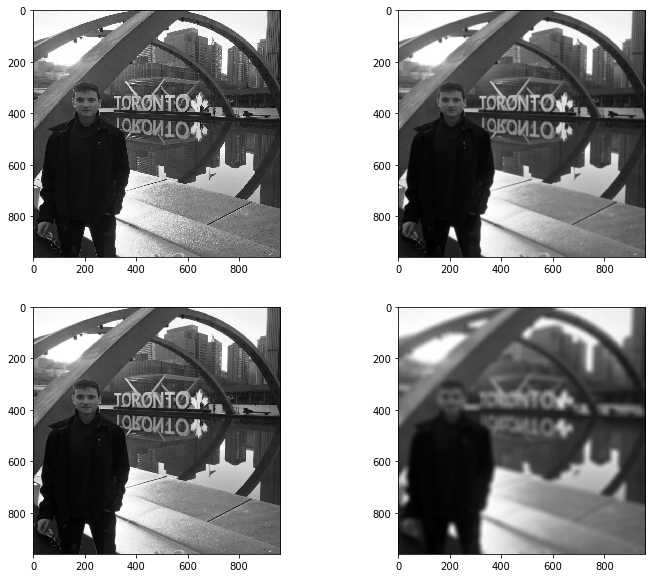

In [351]:
fig = plt.figure(figsize = (12,10))

plt.subplot(221)
plt.imshow(timi[:,:,0],cmap = "gray")

plt.subplot(222)
plt.imshow(cv2.GaussianBlur(timi[:,:,0],(9,9),0),cmap = "gray")

plt.subplot(223)
plt.imshow(cv2.GaussianBlur(timi[:,:,0],(3, 3),3),cmap = "gray")

plt.subplot(224)
plt.imshow(cv2.GaussianBlur(timi[:,:,0],(27,27),10),cmap = "gray")



### 3.1 Onehot after Gaussian Blur

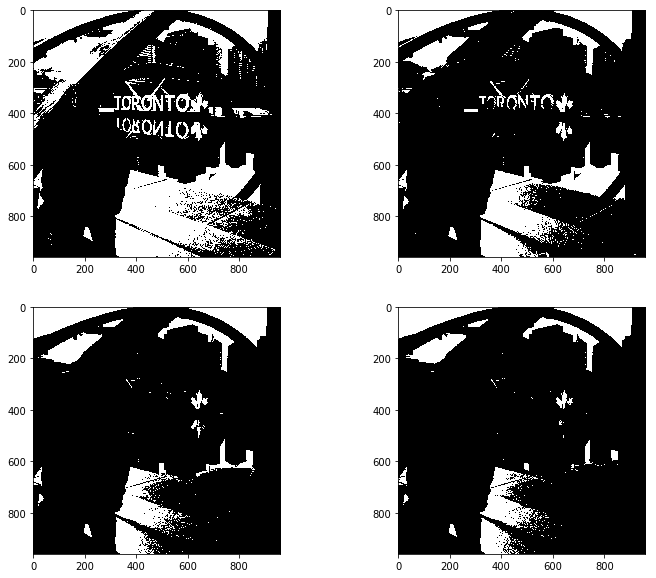

In [361]:
fig = plt.figure(figsize = (12,10))
plt.subplot(221)
plt.imshow(onehot_spec(timi[:,:,0],threshold=256/2, low =0, high = 1), cmap = "gray")


plt.subplot(222)
plt.imshow(onehot_spec(timi[:,:,0],threshold=256/3*2, low =0, high = 1), cmap = "gray")

plt.subplot(223)
plt.imshow(onehot_spec(timi[:,:,0],threshold=256/5*4, low =0, high = 1), cmap = "gray")

plt.subplot(224)
plt.imshow(onehot_spec(timi[:,:,0],threshold=256/6*5, low =0, high = 1), cmap = "gray")




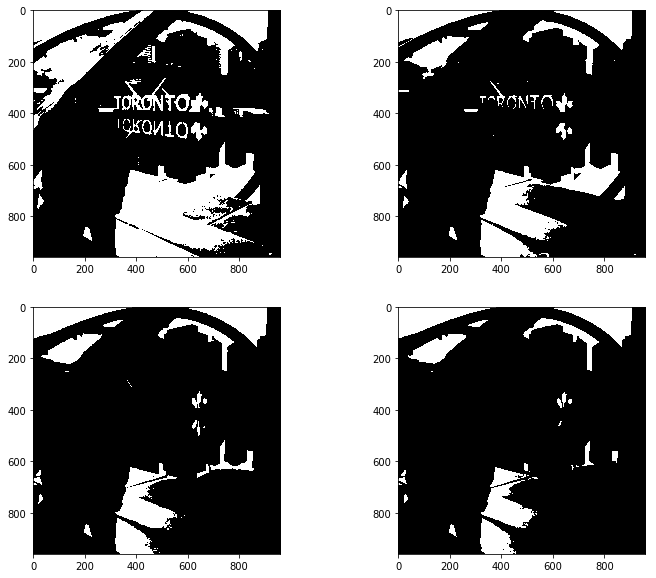

In [362]:
fig = plt.figure(figsize = (12,10))
plt.subplot(221)
plt.imshow(onehot_spec(cv2.GaussianBlur(timi[:,:,0],(9,9),0),threshold=256/2, low =0, high = 1), cmap = "gray")


plt.subplot(222)
plt.imshow(onehot_spec(cv2.GaussianBlur(timi[:,:,0],(9,9),0),threshold=256/3*2, low =0, high = 1), cmap = "gray")

plt.subplot(223)
plt.imshow(onehot_spec(cv2.GaussianBlur(timi[:,:,0],(9,9),0),threshold=256/5*4, low =0, high = 1), cmap = "gray")

plt.subplot(224)
plt.imshow(onehot_spec(cv2.GaussianBlur(timi[:,:,0],(9,9),0),threshold=256/6*5, low =0, high = 1), cmap = "gray")




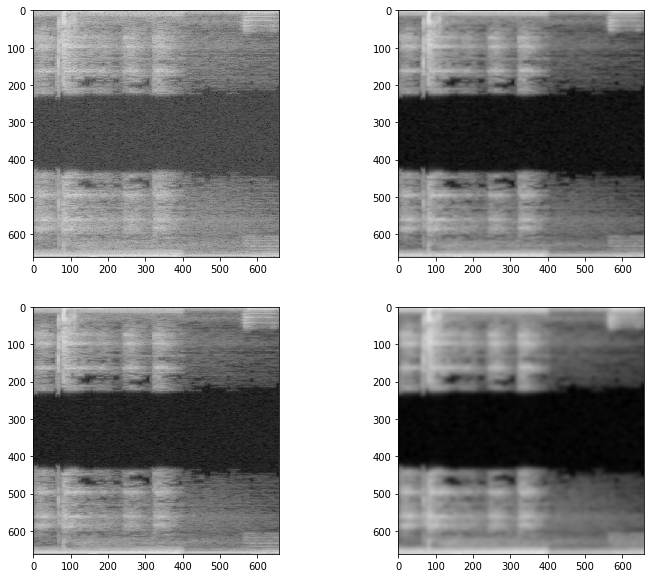

In [357]:
fig = plt.figure(figsize = (12,10))

plt.subplot(221)
plt.imshow(spec3,cmap = "gray")

plt.subplot(222)
plt.imshow(cv2.GaussianBlur(spec3,(9,9),0),cmap = "gray")

plt.subplot(223)
plt.imshow(cv2.GaussianBlur(spec3,(3, 3),0),cmap = "gray")

plt.subplot(224)
plt.imshow(cv2.GaussianBlur(spec3,(27,27),0),cmap = "gray")



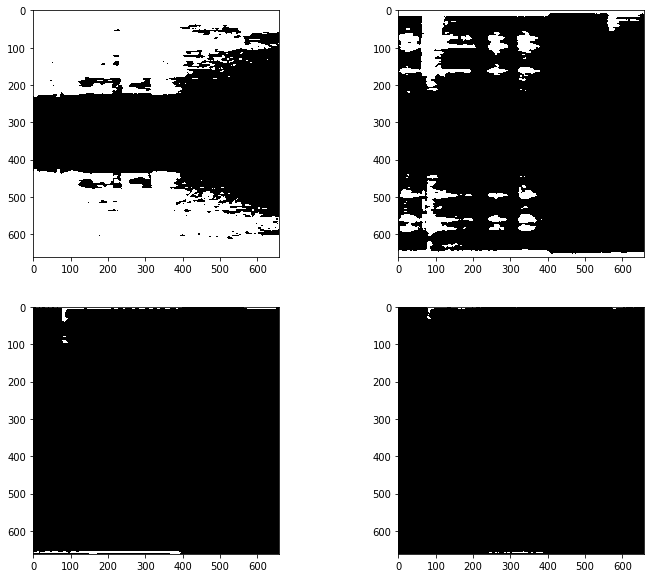

In [364]:
fig = plt.figure(figsize = (12,10))
plt.subplot(221)
plt.imshow(onehot_spec(cv2.GaussianBlur(spec3,(9,9),0),threshold=1/2, low =0, high = 1), cmap = "gray")


plt.subplot(222)
plt.imshow(onehot_spec(cv2.GaussianBlur(spec3,(9,9),0),threshold=1/3*2, low =0, high = 1), cmap = "gray")

plt.subplot(223)
plt.imshow(onehot_spec(cv2.GaussianBlur(spec3,(9,9),0),threshold=1/5*4, low =0, high = 1), cmap = "gray")

plt.subplot(224)
plt.imshow(onehot_spec(cv2.GaussianBlur(spec3,(9,9),0),threshold=1/6*5, low =0, high = 1), cmap = "gray")




### 3.2 Gaussian Blur for edge detection

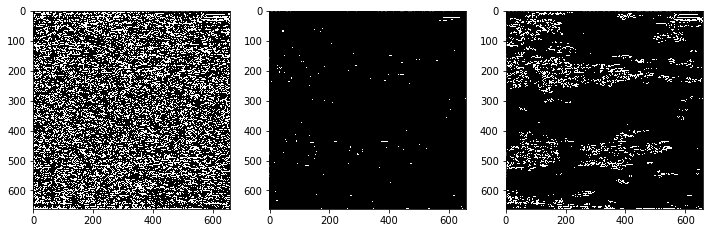

In [370]:
edges_spec1 = edges_spec(spec3, scale = 255,lowerbound=0,upperbound=100)
edges_spec2 = edges_spec(spec3, scale = 255,lowerbound=100,upperbound=200)
edges_spec3 = edges_spec(spec3, scale = 255,lowerbound=0,upperbound=200)

fig = plt.figure(figsize = (12,10))
plt.subplot(131)
plt.imshow(edges_spec1,cmap = "gray")
plt.subplot(132)
plt.imshow(edges_spec2,cmap = "gray")
plt.subplot(133)
plt.imshow(edges_spec3,cmap = "gray")


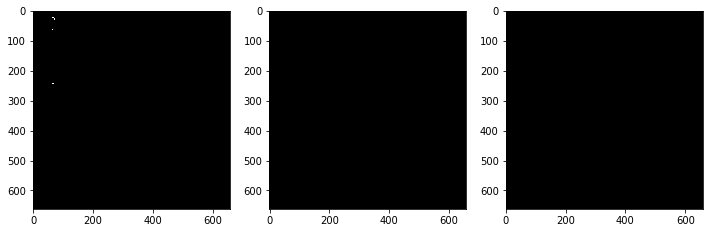

In [371]:
edges_spec1 = edges_spec(cv2.GaussianBlur(spec3,(9,9),0), scale = 255,lowerbound=0,upperbound=100)
edges_spec2 = edges_spec(cv2.GaussianBlur(spec3,(9,9),0), scale = 255,lowerbound=100,upperbound=200)
edges_spec3 = edges_spec(cv2.GaussianBlur(spec3,(9,9),0), scale = 255,lowerbound=0,upperbound=200)

fig = plt.figure(figsize = (12,10))
plt.subplot(131)
plt.imshow(edges_spec1,cmap = "gray")
plt.subplot(132)
plt.imshow(edges_spec2,cmap = "gray")
plt.subplot(133)
plt.imshow(edges_spec3,cmap = "gray")


## 4. Dimensionality reduction with `MaxPooling2D`

In [376]:
spec1.shape,spec2.shape,spec3.shape


((662, 659), (662, 659), (662, 659))

In [434]:
np.expand_dims(spec1, axis =0 )


array([[[0.6751766 , 0.6655203 , 0.69842017, ..., 0.83325493,
         0.85976255, 0.86701673],
        [0.6774521 , 0.7045335 , 0.7343306 , ..., 0.8001195 ,
         0.8165233 , 0.8137791 ],
        [0.75033444, 0.72135645, 0.705295  , ..., 0.83531636,
         0.78906304, 0.8648038 ],
        ...,
        [0.7008677 , 0.69113034, 0.7071089 , ..., 0.7673522 ,
         0.73467946, 0.73979783],
        [0.6840407 , 0.67741054, 0.6586883 , ..., 0.73943913,
         0.7597929 , 0.76244324],
        [0.6162946 , 0.60548127, 0.64432067, ..., 0.6858315 ,
         0.6938663 , 0.76004285]]], dtype=float32)

In [431]:
image_input = Input(shape = (662, 659,1))
pool = MaxPooling2D(pool_size=2,strides=4)(image_input)
local = LocallyConnected2D(16, (3, 3))(pool)
model = Model(inputs=image_input, outputs=local)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 662, 659, 1)       0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 166, 165, 1)       0         
_________________________________________________________________
locally_connected2d_3 (Local (None, 164, 163, 16)      4277120   
Total params: 4,277,120
Trainable params: 4,277,120
Non-trainable params: 0
_________________________________________________________________


In [415]:
tmp = np.expand_dims(np.expand_dims(spec1,axis = 0),axis = -1)
tmp.shape

(1, 662, 659, 1)

In [416]:
spec_pooled = model.predict(tmp)[0,:,:,0]

(166, 165)

(662, 659)

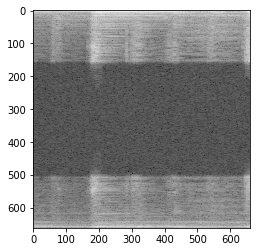

In [424]:
plt.imshow(spec1,cmap = "gray")
spec1.shape

(166, 165)

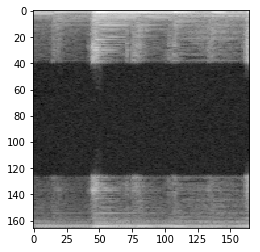

In [425]:
plt.imshow(spec_pooled,cmap = "gray")
spec_pooled.shape